In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.api as sms


!git clone https://github.com/iserranoz/up_econometria.git

Cloning into 'up_econometria'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 61 (delta 14), reused 19 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 6.27 MiB | 4.31 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
import pandas as pd
df = pd.read_parquet('/content/up_econometria/data_enigh_2.parquet')
df = df.loc[df.estado=='Ciudad de México',:]
df.head()


,antiguedad,cuart_dorm,num_cuarto,bano_comp,focos_ahor,tot_resid,tot_hom,tot_muj,renta,estado,municipio
1502,1,2,5,1,7,3,2,1,4000,Ciudad de México,Azcapotzalco
1503,1,1,4,1,5,1,0,1,5000,Ciudad de México,Azcapotzalco
1504,50,2,4,1,5,3,1,2,3500,Ciudad de México,Azcapotzalco
1505,50,2,5,1,6,5,3,2,3500,Ciudad de México,Azcapotzalco
1506,37,1,3,1,5,2,0,2,3000,Ciudad de México,Azcapotzalco


In [3]:
#Eliminamos las columnas que actualmente son de tio string, ya que las volveremos dummies más adelante
df = df.drop(columns=['estado', 'municipio'])

In [4]:
model = smf.ols(formula='renta ~ antiguedad + cuart_dorm + num_cuarto + bano_comp + focos_ahor + tot_resid + tot_hom + tot_muj', data=df)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  renta   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     32.29
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           6.35e-32
Time:                        03:33:33   Log-Likelihood:                -2532.2
No. Observations:                 263   AIC:                             5080.
Df Residuals:                     255   BIC:                             5109.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -714.4904    816.636     -0.875      0.3

In [5]:
for column in df.columns:
  if column != 'renta':
    correlation, p_value = pearsonr(df['renta'], df[column])

    print(f"Correlación entre renta y {column}: {correlation:.3f}")
    print(f"P-value: {p_value:.3f}")

    # prueba de hipotesis (H0: correlacion es )
    if p_value < 0.05:
      print("Se rechaza H0")
    else:
      print("No se rechaza H0")
    print("---")

Correlación entre renta y antiguedad: 0.175
P-value: 0.004
Se rechaza H0
---
Correlación entre renta y cuart_dorm: 0.322
P-value: 0.000
Se rechaza H0
---
Correlación entre renta y num_cuarto: 0.486
P-value: 0.000
Se rechaza H0
---
Correlación entre renta y bano_comp: 0.567
P-value: 0.000
Se rechaza H0
---
Correlación entre renta y focos_ahor: 0.619
P-value: 0.000
Se rechaza H0
---
Correlación entre renta y tot_resid: -0.115
P-value: 0.063
No se rechaza H0
---
Correlación entre renta y tot_hom: -0.087
P-value: 0.157
No se rechaza H0
---
Correlación entre renta y tot_muj: -0.080
P-value: 0.194
No se rechaza H0
---


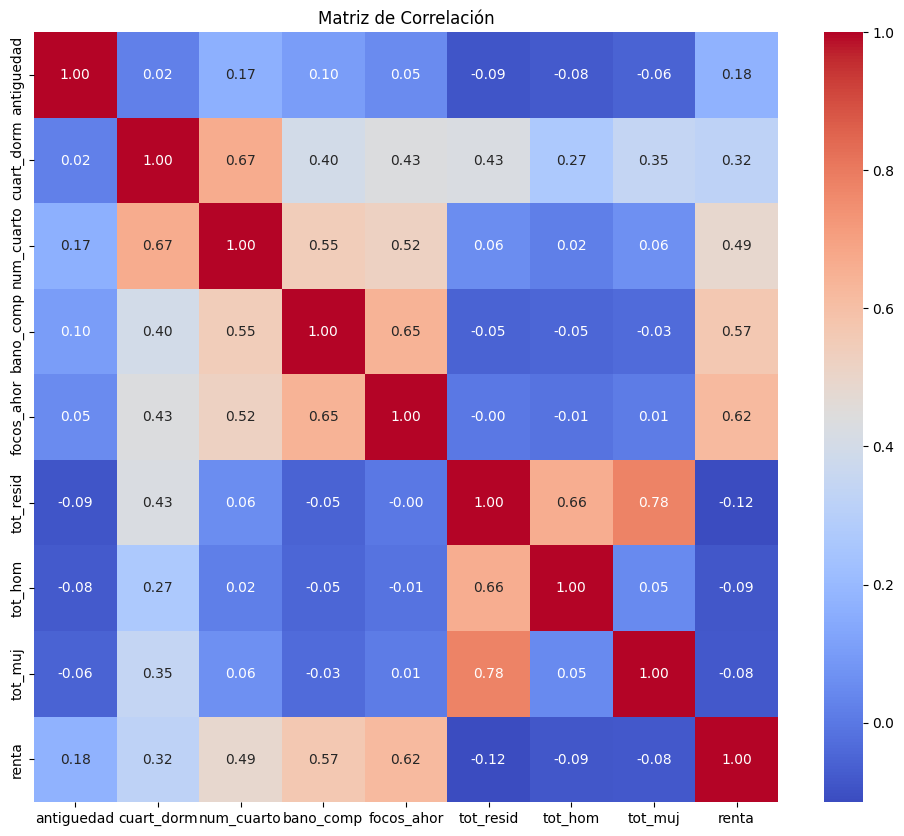

In [6]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [7]:
#Se puede observar que existe una correlación lineal alta entre hombres y total de residentes, así como mujeres y total de residentes.
#De aquí que esa variable es la combinación lineal de las otras, por lo que a continuación para aclara la sospecha generemos una regresion lineal multiple tomando
#como variable dependiente total de hombres

df2 = df.drop(columns=['renta'])
df2.head()

formula = 'tot_resid ~ ' + ' + '.join(df2.drop(columns=['tot_resid']).columns)
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              tot_resid   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.934e+29
Date:                Sun, 06 Oct 2024   Prob (F-statistic):               0.00
Time:                        03:33:37   Log-Likelihood:                 7908.1
No. Observations:                 263   AIC:                        -1.580e+04
Df Residuals:                     255   BIC:                        -1.577e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.581e-15    4.7e-15      0.549      0.5

In [8]:
#De aquí vemos que la R2 es de 1, por lo que en efecto esta variable es una combinación
#lineal de otras, por lo que la eliminamos del dataset

df = df.drop(columns=['tot_resid'])

In [9]:
#Nuevamente ejecutamos la regresion lineal

formula = 'renta ~ ' + ' + '.join(df.drop(columns=['renta']).columns)
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  renta   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     32.29
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           6.35e-32
Time:                        03:33:38   Log-Likelihood:                -2532.2
No. Observations:                 263   AIC:                             5080.
Df Residuals:                     255   BIC:                             5109.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -714.4904    816.636     -0.875      0.3

{'LM Statistic': 64.45742146752242, 'LM-Test p-value': 1.9328601094469612e-11, 'F-Statistic': 11.82664091192446, 'F-Test p-value': 4.880040163268194e-13}


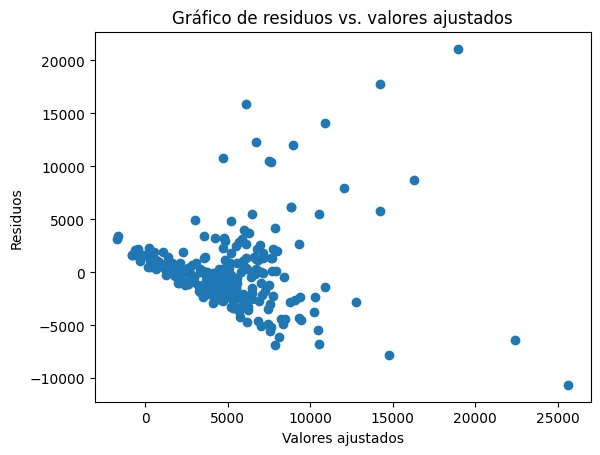

In [10]:
residuals = model.resid

# Realizar la prueba de Breusch-Pagan para heterocedasticidad
breusch_pagan_test = sms.het_breuschpagan(residuals, model.model.exog)

# Imprimir los resultados de la prueba
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, breusch_pagan_test)))

# Interpretar los resultados
# Si el p-valor es menor que el nivel de significancia (por ejemplo, 0.05),
# se rechaza la hipótesis nula de homocedasticidad y se concluye que hay heterocedasticidad.
# Si el p-valor es mayor que el nivel de significancia, no se rechaza la hipótesis nula
# y se concluye que no hay evidencia de heterocedasticidad.

# También se puede visualizar la heterocedasticidad graficando los residuos
# frente a los valores ajustados o las variables predictoras.
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs. valores ajustados')
plt.show()


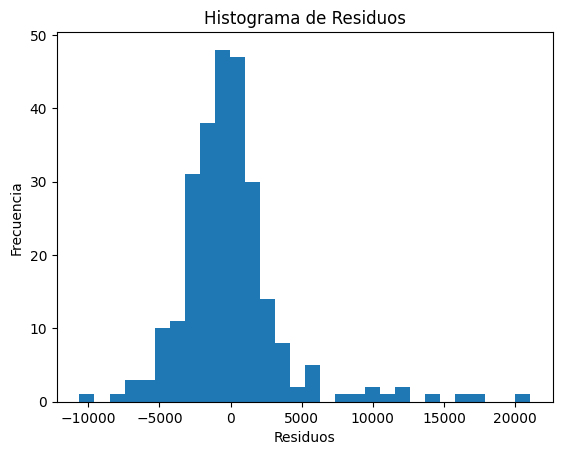

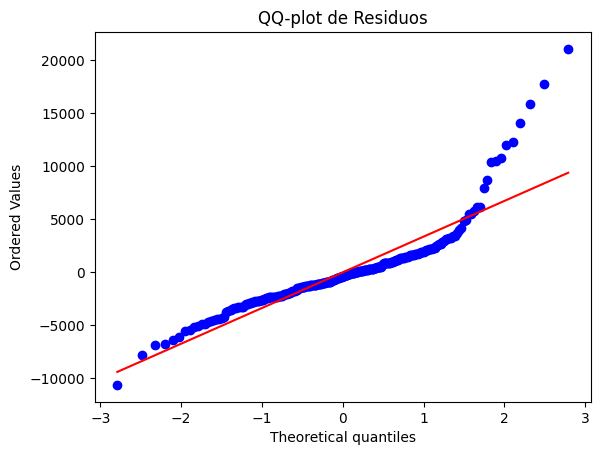

In [11]:
# Histograma de los residuos
plt.hist(residuals, bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

# QQ-plot de los residuos
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-plot de Residuos')
plt.show()


In [12]:
# Aplicamos una transformación logartimica al valor Y: Renta
df['renta_log'] = np.log(df['renta'])

In [13]:
formula = 'renta_log ~ ' + ' + '.join(df.drop(columns=['renta', 'renta_log']).columns)
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              renta_log   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     45.14
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           3.06e-41
Time:                        03:33:49   Log-Likelihood:                -193.97
No. Observations:                 263   AIC:                             403.9
Df Residuals:                     255   BIC:                             432.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1406      0.112     63.510      0.0

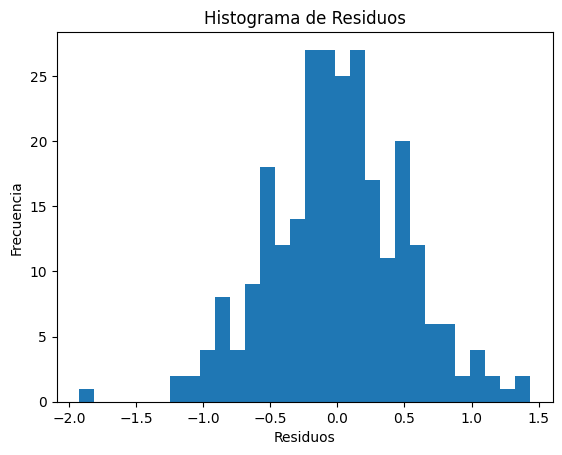

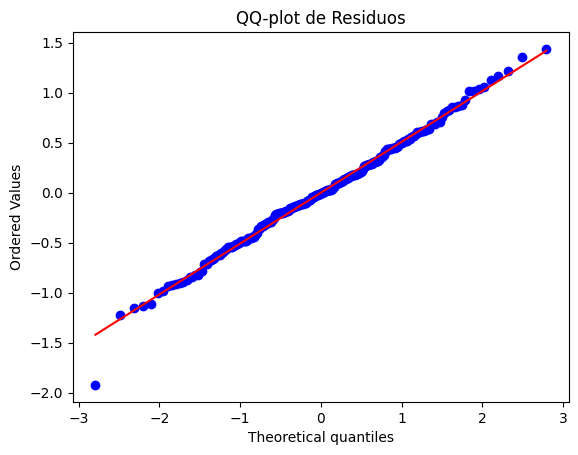

In [14]:
residuals = model.resid

# Histograma de los residuos
plt.hist(residuals, bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

# QQ-plot de los residuos
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-plot de Residuos')
plt.show()

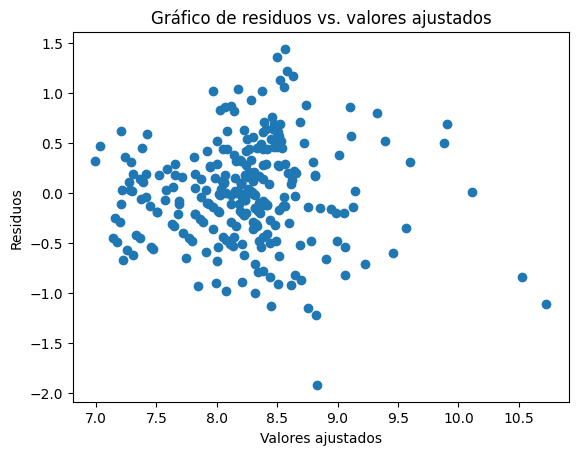

In [15]:
#Gráfica de residus vs valores ajustados para comprobar hetorecedasticidad

plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs. valores ajustados')
plt.show()

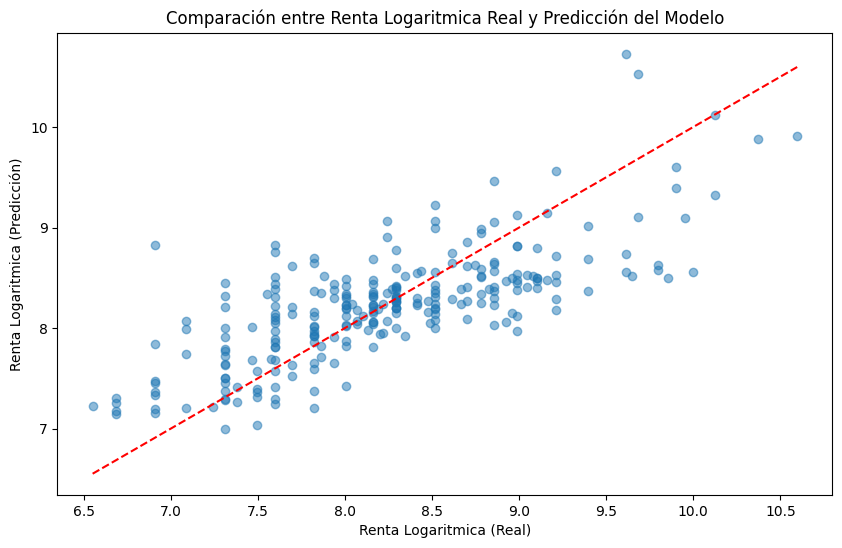

In [16]:
# Obtener las predicciones del modelo
y_pred = model.predict()

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(df['renta_log'], y_pred, alpha=0.5)
plt.xlabel('Renta Logaritmica (Real)')
plt.ylabel('Renta Logaritmica (Predicción)')
plt.title('Comparación entre Renta Logaritmica Real y Predicción del Modelo')
plt.plot([df['renta_log'].min(), df['renta_log'].max()], [df['renta_log'].min(), df['renta_log'].max()], color='red', linestyle='--')
plt.show()


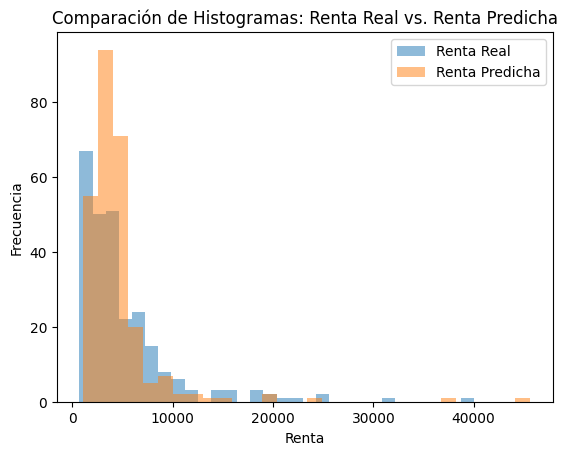

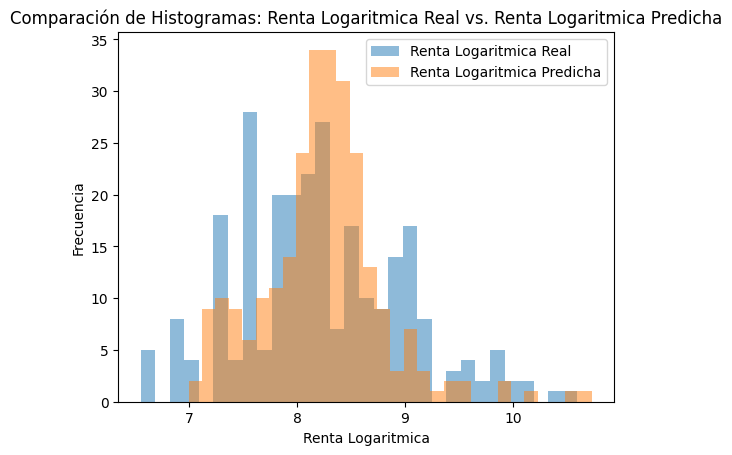

In [17]:
# Histograma de la renta real
plt.hist(df['renta'], bins=30, alpha=0.5, label='Renta Real')

# Histograma de la renta predicha (usando el modelo)
plt.hist(np.exp(model.predict()), bins=30, alpha=0.5, label='Renta Predicha')

plt.xlabel('Renta')
plt.ylabel('Frecuencia')
plt.title('Comparación de Histogramas: Renta Real vs. Renta Predicha')
plt.legend()
plt.show()


# Histograma de la renta real en escala logaritmica
plt.hist(df['renta_log'], bins=30, alpha=0.5, label='Renta Logaritmica Real')

# Histograma de la renta predicha (usando el modelo) en escala logaritmica
plt.hist(model.predict(), bins=30, alpha=0.5, label='Renta Logaritmica Predicha')

plt.xlabel('Renta Logaritmica')
plt.ylabel('Frecuencia')
plt.title('Comparación de Histogramas: Renta Logaritmica Real vs. Renta Logaritmica Predicha')
plt.legend()
plt.show()


In [18]:
X = df[['antiguedad', 'num_cuarto', 'bano_comp', 'focos_ahor', 'tot_hom', 'tot_muj']]

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,antiguedad,3.022217
1,num_cuarto,9.315556
2,bano_comp,6.820490
3,focos_ahor,4.576675
4,tot_hom,2.505934
5,tot_muj,2.663440


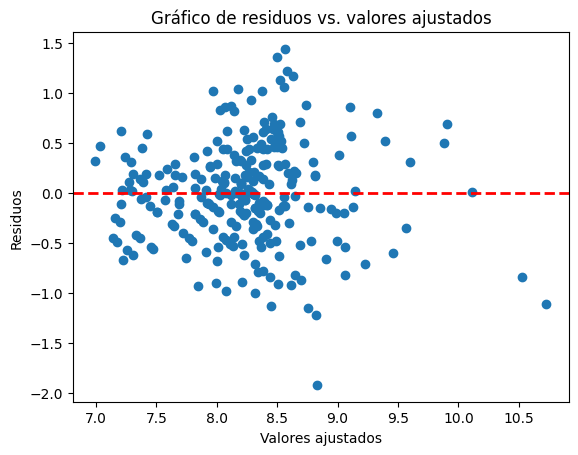

In [19]:
#Gráfica de residus vs valores ajustados para comprobar hetorecedasticidad

plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs. valores ajustados')
plt.show()

In [20]:
# Prueba de White para heterocedasticidad
white_test = sm.stats.diagnostic.het_white(residuals, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

# Interpretar los resultados
# Si el p-valor es menor que el nivel de significancia (por ejemplo, 0.05),
# se rechaza la hipótesis nula de homocedasticidad y se concluye que hay heterocedasticidad.
# Si el p-valor es mayor que el nivel de significancia, no se rechaza la hipótesis nula
# y se concluye que no hay evidencia de heterocedasticidad.



{'LM Statistic': 79.25706228070811, 'LM-Test p-value': 2.7940039833353264e-05, 'F-Statistic': 2.7975968353300398, 'F-Test p-value': 2.506898899154458e-06}


In [79]:
df_2 = pd.read_parquet('/content/up_econometria/data_enigh_2.parquet')
df_2 = df_2.loc[df_2.estado=='Ciudad de México',:]
df_2['renta_log'] = np.log(df_2['renta'])
df_2 = df_2.drop(columns=['tot_resid','renta','estado'])
df_2.head(5)

,antiguedad,cuart_dorm,num_cuarto,bano_comp,focos_ahor,tot_hom,tot_muj,municipio,renta_log
1502,1,2,5,1,7,2,1,Azcapotzalco,8.294050
1503,1,1,4,1,5,0,1,Azcapotzalco,8.517193
1504,50,2,4,1,5,1,2,Azcapotzalco,8.160518
1505,50,2,5,1,6,3,2,Azcapotzalco,8.160518
1506,37,1,3,1,5,0,2,Azcapotzalco,8.006368


In [80]:
df_numerico = pd.get_dummies(df_2, columns=['municipio'], drop_first=True)
df_numerico.columns = df_numerico.columns.str.replace(' ', '_')
df_numerico = df_numerico.rename(columns={'municipio_Gustavo_A._Madero': 'municipio_Gustavo_A_Madero'})
df_numerico.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1502 to 1764
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   antiguedad                        263 non-null    int64  
 1   cuart_dorm                        263 non-null    int64  
 2   num_cuarto                        263 non-null    int64  
 3   bano_comp                         263 non-null    int64  
 4   focos_ahor                        263 non-null    int64  
 5   tot_hom                           263 non-null    int64  
 6   tot_muj                           263 non-null    int64  
 7   renta_log                         263 non-null    float64
 8   municipio_Azcapotzalco            263 non-null    bool   
 9   municipio_Benito_Juarez           263 non-null    bool   
 10  municipio_Coyoacan                263 non-null    bool   
 11  municipio_Cuajimalpa_De_Morelos   263 non-null    bool   
 12  municipio

In [81]:
# Genera la fórmula para la regresión

formula = 'renta_log ~ ' + ' + '.join(df_numerico.drop(columns=['renta_log']).columns)

# Crea el modelo de regresión
model = smf.ols(formula=formula, data=df_numerico).fit()

# Imprime el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              renta_log   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     19.49
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           1.27e-41
Time:                        04:07:59   Log-Likelihood:                -165.21
No. Observations:                 263   AIC:                             376.4
Df Residuals:                     240   BIC:                             458.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

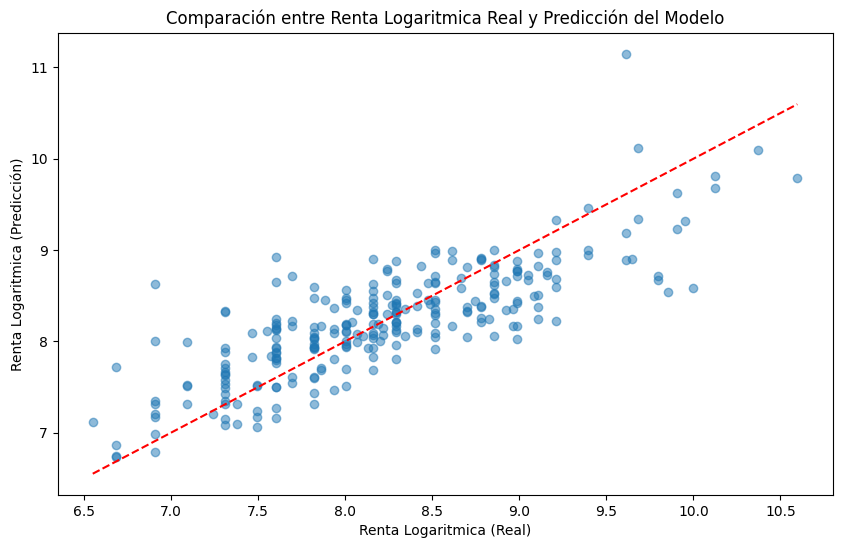

In [82]:
# Obtener las predicciones del modelo
y_pred = model.predict()

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.scatter(df_numerico['renta_log'], y_pred, alpha=0.5)
plt.xlabel('Renta Logaritmica (Real)')
plt.ylabel('Renta Logaritmica (Predicción)')
plt.title('Comparación entre Renta Logaritmica Real y Predicción del Modelo')
plt.plot([df_numerico['renta_log'].min(), df_numerico['renta_log'].max()], [df_numerico['renta_log'].min(), df_numerico['renta_log'].max()], color='red', linestyle='--')
plt.show()

In [83]:
#Quitaremos las variables que no parecen ser significativas que son:
#municipio_Azcapotzalco
#municipio_Coyoacan
#municipio_Cuajimalpa_De_Morelos
#municipio_Gustavo_A_Madero
#municipio_Iztacalco
#municipio_Iztapalapa
#municipio_La_Magdalena_Contreras
#municipio_Tlahuac
#municipio_Tlalpan
#municipio_Venustiano_Carranza

#antiguedad
#cuart_dorm

df_numerico_n = df_numerico.drop(columns=['municipio_Azcapotzalco', 'municipio_Coyoacan',
                                        'municipio_Cuajimalpa_De_Morelos', 'municipio_Gustavo_A_Madero',
                                        'municipio_Iztacalco', 'municipio_Iztapalapa',
                                        'municipio_La_Magdalena_Contreras', 'municipio_Tlahuac',
                                        'municipio_Tlalpan', 'municipio_Venustiano_Carranza',
                                        'antiguedad','cuart_dorm','tot_hom'])
df_numerico_n.head()

,num_cuarto,bano_comp,focos_ahor,tot_muj,renta_log,municipio_Benito_Juarez,municipio_Cuauhtemoc,municipio_Miguel_Hidalgo,municipio_Milpa_Alta,municipio_Xochimilco
1502,5,1,7,1,8.294050,False,False,False,False,False
1503,4,1,5,1,8.517193,False,False,False,False,False
1504,4,1,5,2,8.160518,False,False,False,False,False
1505,5,1,6,2,8.160518,False,False,False,False,False
1506,3,1,5,2,8.006368,False,False,False,False,False


In [84]:
# Genera la fórmula para la regresión

formula = 'renta_log ~ ' + ' + '.join(df_numerico_n.drop(columns=['renta_log']).columns)

# Crea el modelo de regresión
model_2 = smf.ols(formula=formula, data=df_numerico_n).fit()

# Imprime el resumen del modelo
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              renta_log   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     46.63
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           7.75e-49
Time:                        04:08:07   Log-Likelihood:                -171.39
No. Observations:                 263   AIC:                             362.8
Df Residuals:                     253   BIC:                             398.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [ ]:
## Baja ligeramente la R2 pero mejora la R2 cuadrada ajustada pues redicimos bastante la cantidad de columnas